In [1]:
import pandas as pd

# 1.) Clean the Apple Data to get a quarterly series of EPS.

In [2]:
pd.read_csv("AAPL_quarterly_financials.csv")

,name,ttm,09/30/2023,06/30/2023,03/31/2023,12/31/2022,09/30/2022,06/30/2022,03/31/2022,12/31/2021,...,12/31/1987,09/30/1987,06/30/1987,03/31/1987,12/31/1986,09/30/1986,06/30/1986,03/31/1986,12/31/1985,09/30/1985
0,TotalRevenue,"383,285,000,000","89,498,000,000","81,797,000,000","94,836,000,000","117,154,000,000","90,146,000,000","82,959,000,000","97,278,000,000","123,945,000,000",...,"1,042,400,000","786,500,000","637,100,000","575,300,000","662,300,000","510,800,000","448,300,000","408,900,000","533,900,000","409,700,000"
1,\tOperatingRevenue,"383,285,000,000","89,498,000,000","81,797,000,000","94,836,000,000","117,154,000,000","90,146,000,000","82,959,000,000","97,278,000,000","123,945,000,000",...,"1,042,400,000","786,500,000","637,100,000","575,300,000","662,300,000","510,800,000","448,300,000","408,900,000","533,900,000","409,700,000"
2,CostOfRevenue,"214,137,000,000","49,071,000,000","45,384,000,000","52,860,000,000","66,822,000,000","52,051,000,000","47,074,000,000","54,719,000,000","69,702,000,000",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,GrossProfit,"169,148,000,000","40,427,000,000","36,413,000,000","41,976,000,000","50,332,000,000","38,095,000,000","35,885,000,000","42,559,000,000","54,243,000,000",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,OperatingExpense,"54,847,000,000","13,458,000,000","13,415,000,000","13,658,000,000","14,316,000,000","13,201,000,000","12,809,000,000","12,580,000,000","12,755,000,000",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,\tSellingGeneralAndAdministration,"24,932,000,000","6,151,000,000","5,973,000,000","6,201,000,000","6,607,000,000","6,440,000,000","6,012,000,000","6,193,000,000","6,449,000,000",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,\tResearchAndDevelopment,"29,915,000,000","7,307,000,000","7,442,000,000","7,457,000,000","7,709,000,000","6,761,000,000","6,797,000,000","6,387,000,000","6,306,000,000",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,\tDepreciationAmortizationDepletionIncomeState...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,\t\tDepreciationAndAmortizationInIncomeStatement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,\tOtherOperatingExpenses,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
y=pd.read_csv('AAPL_quarterly_financials.csv')

In [5]:
y.index = y.name

In [6]:
y = pd.DataFrame(y.loc["BasicEPS", :]).iloc[2:,:]

In [7]:
y.index = pd.to_datetime(y.index)

In [8]:
# CHECK IF NAS ARE NO DIVIDEND PERIOD
y = y.sort_index().fillna(0.)

In [13]:
y.fillna(0.).sort_index()

,BasicEPS
1985-09-30,0.0
1985-12-31,0.004
1986-03-31,0.002
1986-06-30,0.002
1986-09-30,0.0
...,...
2022-09-30,1.29
2022-12-31,1.89
2023-03-31,1.53
2023-06-30,1.27


# 2.) Come up with 6 search terms you think could nowcast earnings. (Different than the ones I used) Add in 3 terms that that you think will not Nowcast earnings. Pull in the gtrends data

In [9]:
from pytrends.request import TrendReq

In [147]:
# Create pytrends object
pytrends = TrendReq(hl='en-US', tz=360)

# Set up the keywords and the timeframe
keywords = ["iPhone", "MacBook", "AirTags","iWork", "Steve Jobs", "iPad", "Asia", "Japan", "bookstore"]  # Add your keywords here
start_date = '2004-01-01'
end_date = '2024-01-01'

# Create an empty DataFrame to store the results
df = pd.DataFrame()

# Iterate through keywords and fetch data
for keyword in keywords:
    pytrends.build_payload([keyword], cat=0, timeframe=f'{start_date} {end_date}', geo='', gprop='')
    interest_over_time_df = pytrends.interest_over_time()
    df[keyword] = interest_over_time_df[keyword]

In [148]:
X = df.resample("Q").mean()

In [149]:
X

,iPhone,MacBook,AirTags,iWork,Steve Jobs,iPad,Asia,Japan,bookstore
date,,,,,,,,,
2004-03-31,0.000000,0.000000,0.000000,2.666667,1.000000,0.000000,14.666667,29.666667,70.000000
2004-06-30,0.000000,0.000000,0.000000,2.333333,1.000000,0.000000,15.666667,32.000000,66.000000
2004-09-30,0.000000,0.000000,0.666667,3.000000,1.000000,0.000000,16.000000,27.666667,80.666667
2004-12-31,0.000000,0.000000,0.333333,1.333333,1.000000,0.000000,17.333333,27.666667,72.666667
2005-03-31,0.000000,0.000000,0.333333,37.333333,1.000000,0.000000,20.333333,26.333333,65.333333
...,...,...,...,...,...,...,...,...,...
2023-03-31,50.000000,79.000000,30.666667,2.000000,1.666667,23.000000,11.666667,22.333333,26.666667
2023-06-30,43.666667,69.000000,30.666667,1.333333,1.000000,20.666667,11.666667,21.666667,22.000000
2023-09-30,52.000000,79.000000,34.000000,2.000000,1.333333,23.333333,46.000000,22.333333,29.666667


In [150]:
# Align Data
temp = pd.concat([y, X],axis = 1).dropna()
y = temp[["BasicEPS"]].copy()
X = temp.iloc[:,1:].copy()

In [151]:
temp

,BasicEPS,iPhone,MacBook,AirTags,iWork,Steve Jobs,iPad,Asia,Japan,bookstore
2004-03-31,0.002,0.000000,0.000000,0.000000,2.666667,1.000000,0.000000,14.666667,29.666667,70.000000
2004-06-30,0.003,0.000000,0.000000,0.000000,2.333333,1.000000,0.000000,15.666667,32.000000,66.000000
2004-09-30,0.0,0.000000,0.000000,0.666667,3.000000,1.000000,0.000000,16.000000,27.666667,80.666667
2004-12-31,0.013,0.000000,0.000000,0.333333,1.333333,1.000000,0.000000,17.333333,27.666667,72.666667
2005-03-31,0.013,0.000000,0.000000,0.333333,37.333333,1.000000,0.000000,20.333333,26.333333,65.333333
...,...,...,...,...,...,...,...,...,...,...
2022-09-30,1.29,52.000000,83.666667,38.333333,2.000000,1.666667,23.000000,31.333333,19.000000,34.000000
2022-12-31,1.89,49.333333,75.666667,33.666667,2.000000,1.666667,26.333333,12.333333,24.333333,24.000000
2023-03-31,1.53,50.000000,79.000000,30.666667,2.000000,1.666667,23.000000,11.666667,22.333333,26.666667
2023-06-30,1.27,43.666667,69.000000,30.666667,1.333333,1.000000,20.666667,11.666667,21.666667,22.000000


# 3.) Normalize all the X data

In [152]:
from sklearn.preprocessing import StandardScaler

In [153]:
scaler = StandardScaler()

In [154]:
X_scaled = scaler.fit_transform(X)

# 4.) Run a Lasso with lambda of .5. Plot a bar chart.

lambda equal .5 resulted in all coefficients zero, so I changed to 0.05.

In [155]:
from sklearn.linear_model import Lasso

In [166]:
lasso=Lasso(alpha=.05)

In [167]:
lasso.fit(X_scaled, y)

Lasso(alpha=0.05)

In [168]:
coefficients = lasso.coef_

In [169]:
coefficients

array([ 0.08354056,  0.02103985,  0.17738186, -0.08293574,  0.        ,
        0.        ,  0.        , -0.        , -0.16565742])

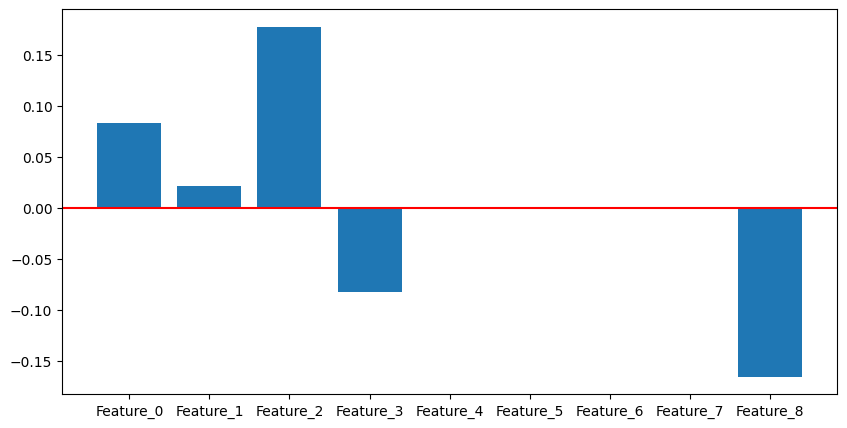

In [170]:
import matplotlib.pyplot as plt

X = pd.DataFrame(columns=[f'Feature_{i}' for i in range(len(coefficients))])

# Plotting the bar chart
plt.figure(figsize=(10, 5))
plt.bar(range(len(coefficients)), coefficients)  # Plotting the bars
plt.xticks(range(len(coefficients)), X.columns)  # Adding x-axis labels
plt.axhline(0, color="red")                      # Adding a horizontal line at y=0
plt.show()

# 5.) Do these coefficient magnitudes make sense?

The coefficient magnitudes make sense to some extent. Three Apple product names seem to have explanatory power. The words such as Asia and Japan which have no relation with Apple have no explanatory power. 